In [15]:
import scipy.stats as stats
import pandas as pd
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [16]:
df=pd.read_csv('C:/Users/areum/Desktop/POC시연자료/이원분산분석.csv')

In [17]:
df = df.dropna(axis=0)

In [18]:
df['sex'] = df['sex'].map({'여자':0, '남자':1})

In [19]:
df=df.dropna()

In [20]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [21]:
df['sex'] = df['sex'].astype('int')

In [22]:
df=df[df.age != '#VALUE!']

In [23]:
df['age']=df['age'].astype('int')

In [24]:
df.to_csv("C:/Users/areum/Desktop/POC시연자료/anova.csv", index=False)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7979 entries, 1 to 8910
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   sex     7979 non-null   int32
 1   age     7979 non-null   int32
 2   total   7979 non-null   int64
dtypes: int32(2), int64(1)
memory usage: 187.0 KB


<AxesSubplot:title={'center':'total'}, xlabel='sex'>

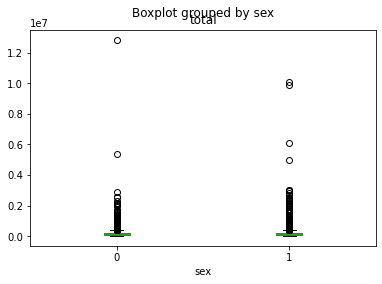

In [26]:
df.boxplot(column = 'total', by='sex' , grid = False)

<AxesSubplot:title={'center':'total'}, xlabel='age'>

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


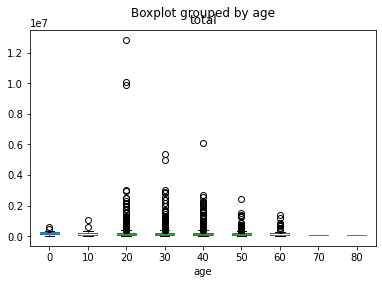

In [27]:
import warnings
plt.rcParams['font.family'] = 'NanumGothic'
warnings.filterwarnings(action='ignore')
df.boxplot(column = 'total', by='age' , grid = False)

In [28]:
model = ols('total~ C(age) * C(sex)',df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(age),8.0,6.519220e+11,8.149024e+10,0.779867,0.620497
C(sex),1.0,3.959721e+10,3.959721e+10,0.378948,0.538184
C(age):C(sex),8.0,1.510634e+12,1.888292e+11,1.807108,0.070783
Residual,7965.0,8.322827e+14,1.044925e+11,NaN,NaN


In [29]:
df.columns = ['independ1','independ2','depend']

In [30]:
df['independ1'].unique()

array([0, 1])

In [31]:
colour = ['red', 'green', 'blue', 'yellow', 'pink', 'purple', 'gray', 'navy', 'brown']

df_new = df.drop_duplicates(subset = "independ1")
df_new= sorted(df_new['independ1'])

In [32]:
group=[]
match={}
for i in range(len(df_new)):
    group.append(str(df_new[i]))
    match[group[i]]=colour[i]

In [33]:
df['independ1']=df['independ1'].astype(str)

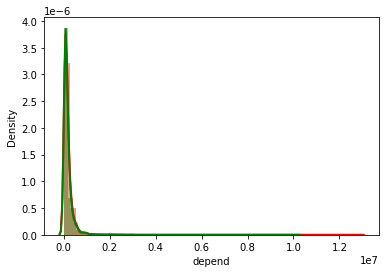

In [34]:
for group in match:
    subset = df[df['independ1'] == group]
    sns.distplot(subset['depend'],
                 hist = True,
                 kde = True,
                 kde_kws = {'linewidth': 2},
                 color = match[group],
                 label = group)

In [48]:
def histogram(df, independ):
    colour = ['red', 'green', 'blue', 'yellow', 'pink', 'purple', 'gray', 'navy', 'brown']
    df_new = df.drop_duplicates(subset=independ)
    df_new = sorted(df_new[independ])
    df[independ] = df[independ].astype(str)

    group = []
    match = {}
    for i in range(len(df_new)):
        group.append(str(df_new[i]))
        match[group[i]] = colour[i]

    for group in match:
        subset = df[df[independ] == group]
        sns.distplot(subset['depend'], hist=True, kde=True, kde_kws={'linewidth': 2}, color=match[group],label=group)
        plt.title(independ+"분류에 의한 종속변수 분포")
        plt.legend(prop={'size': 12}, title='group')
        plt.show()

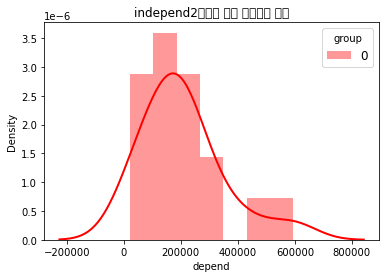

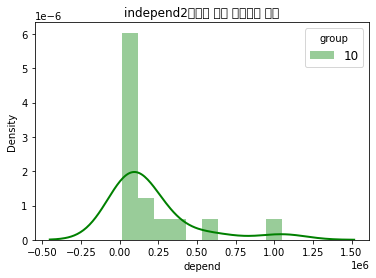

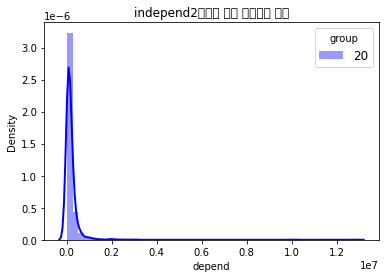

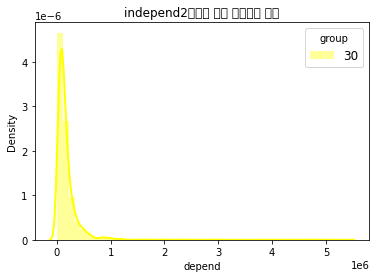

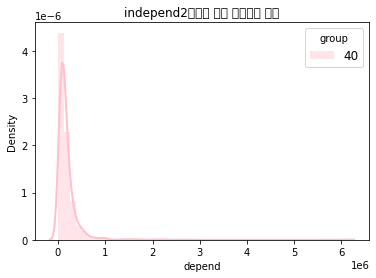

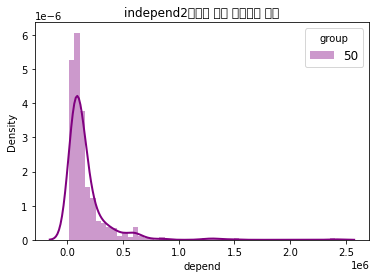

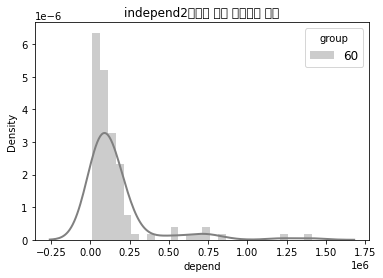

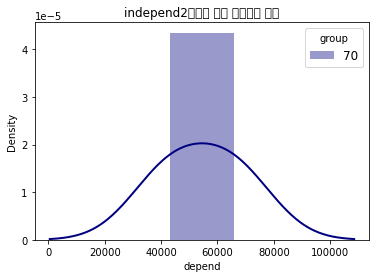

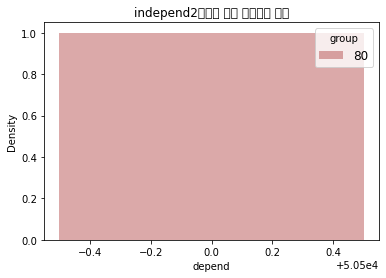

In [49]:
histogram(df, 'independ2')

In [252]:
df

,sex,age,total
1,0,30,163500
2,0,30,89000
3,1,50,84000
4,1,30,120000
5,1,30,29900
6,1,40,27800
7,1,30,449500
8,1,40,50000
9,1,40,120000
10,1,20,89500


In [251]:
import statsmodels.stats.multicomp as mc

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff p-adj     lower      upper    reject
------------------------------------------------------------
     0      1 1573.0208 0.8358 -12850.5391 15996.5808  False
------------------------------------------------------------


ValueError: The lengths of the data (2) and the error 1 do not match

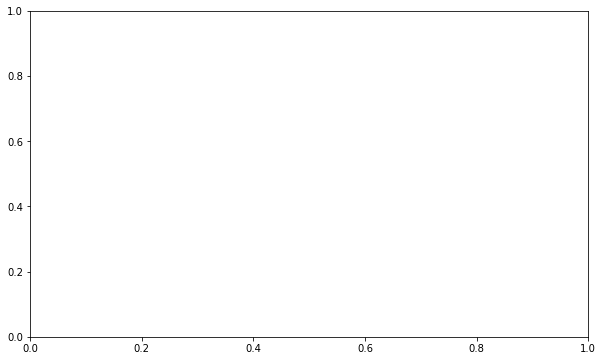

In [253]:
comp = mc.MultiComparison(df['total'], df['sex'])
tukeyhsd = comp.tukeyhsd(alpha=0.05)
tukeyhsd.summary()
print(tukeyhsd)
fig = tukeyhsd.plot_simultaneous()

In [1]:
# mz세대로 다시 나누기

In [4]:
df=pd.read_csv('C:/Users/areum/Desktop/POC시연자료/anova.csv')

In [6]:
df.drop(['sex'], axis=1,inplace=True)

In [7]:
df

,age,total
0,30,163500
1,30,89000
2,50,84000
3,30,120000
4,30,29900
...,...,...
7974,30,45000
7975,40,18000
7976,30,79800
7977,40,70000


In [8]:
conditionlist = [
    (df['age'] <= 20),
    (df['age'] <= 40),
    (df['age'] <= 60),
    (df['age'] <= 80),
    (df['age'] <= 100)]
choicelist = ['1', '2', '3','4','5']
df['Generation'] = np.select(conditionlist, choicelist, default='Not Specified')

In [10]:
df.head(50)

,age,total,Generation
0,30,163500,2
1,30,89000,2
2,50,84000,3
3,30,120000,2
4,30,29900,2
5,40,27800,2
6,30,449500,2
7,40,50000,2
8,40,120000,2
9,20,89500,1


In [11]:
df.to_csv("C:/Users/areum/Desktop/POC시연자료/anova2.csv", index=False)

In [13]:
df=pd.read_csv('C:/Users/areum/Desktop/POC시연자료/anova2.csv')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7979 entries, 0 to 7978
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   generation  7979 non-null   int64
 1   age         7979 non-null   int64
 2   total       7979 non-null   int64
dtypes: int64(3)
memory usage: 187.1 KB
